## CMPE/CISC 452 NLP Text Classification

BY Liam, Hayden, Taylor, Andrew

In [40]:
# Data Visualization
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [19]:
# Preprocessing Imports
import re    # RegEx for removing non-letter characters
import nltk  # natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
import time
from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to C:\Users\Hayden
[nltk_data]     Murphy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Tokenizing & Padding Imports
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pickle

In [21]:
# For Building the model imports
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import keras.backend as K

In [22]:
# Bidirectional LSTM Using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

In [23]:
def load_datasets():
    # Load Mobi Tweet dataset
    df1 = pd.read_csv('dataset/Twitter_Data.csv')

    # Print Modi Tweets
    # print(df1.head())

    # Load Apple Tweet dataset
    df2 = pd.read_csv('dataset/apple-twitter-sentiment-texts.csv')
    df2 = df2.rename(columns={'text': 'clean_text', 'sentiment': 'category'})
    df2['category'] = df2['category'].map({-1: -1.0, 0: 0.0, 1: 1.0})

    # Print Apple Tweets
    # print(df2.head())

    # Load Airplane Tweet dataset
    df3 = pd.read_csv('dataset/Tweets.csv')
    df3 = df3.rename(columns={'text': 'clean_text', 'airline_sentiment': 'category'})
    df3['category'] = df3['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive': 1.0})
    df3 = df3[['category', 'clean_text']]

    # Print Airplane tweets
    # print(df3.head())

    # Combine datasets
    df = pd.concat([df1, df2, df3], ignore_index=True)

    df.isnull().sum()

    # Drop missing rows
    df.dropna(axis=0, inplace=True)

    # Dimensionality of the data
    df.shape

    # Map tweet categories
    df['category'] = df['category'].map({-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'})

    # Output first five rows
    df.head()

    # Return Data Frame
    return df

In [24]:
def visualize_Data (df):
    # The distribution of sentiments
    df.groupby('category').count().plot(kind='bar')

    # Grouping by 'category' and counting occurrences, then plotting the counts as a bar plot

    plt.xlabel('Category')
    plt.ylabel('Value')
    plt.title('Tweet Data Visualization')
    plt.show()

# TODO Remove Value 

In [25]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    
    # Test Print
    #print(words)

    # return list
    return words

In [26]:
def preprocessing(df):
    # Calculate Start time of tweet_to_words function
    start_time = time.time()
    print("Running Preprocessing")
    # Apply data preprocessing to each tweet
    X = list(map(tweet_to_words, df['clean_text']))

    # Calculate End time of tweet_to_words function
    end_time = time.time()

    # Calculate elapsed time
    elapsed_time = end_time - start_time
    print("Finished Preprocessing")
    print(f"Elapsed time: {elapsed_time} seconds")

    # Encode target labels
    le = LabelEncoder()
    Y = le.fit_transform(df['category'])

    print(X[0])
    print(Y[0])
   
    return X, Y

In [27]:
max_words = 5000
max_len=50

In [28]:
def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

In [29]:
def f1_score(precision, recall):
    ''' Function to calculate f1 score '''

    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

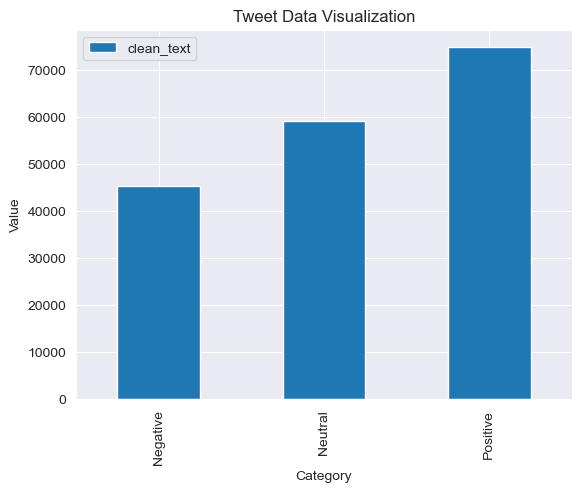

Running Preprocessing
Finished Preprocessing
Elapsed time: 571.9264113903046 seconds
['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']
0


G:\Conda\envs\school\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
G:\Conda\envs\school\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [30]:
# Load Datasets
df = load_datasets()

# Visualize Data
visualize_Data(df)

# Preprocessing
X, Y = preprocessing(df)

G:\Conda\envs\school\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


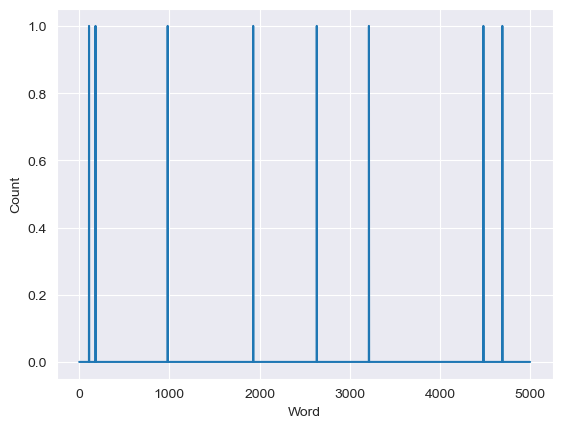

Before Tokenization & Padding 
 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
After Tokenization & Padding 
 [  41    1  346   72 1888 1161   44 2450    2 1275  219    2  241   31
  163  102   53   58 1171  241   50    3    6  534    3   50 3755    3
 3041    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [31]:
# ---Tokenizing & Padding---
# Train and test split
# TODO place these 3 lines in function (Used multiple times)
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
                                   #                               ngram_range=(1,2),    # unigram and bigram
                                   preprocessor=lambda x: x,
                                   tokenizer=lambda x: x)
# tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

# Plot the BoW feature vector
plt.plot(X_train[2, :])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

print('Before Tokenization & Padding \n', df['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_text'])
print('After Tokenization & Padding \n', X[0])

In [32]:
# TODO Fix Loading Issue
'''
file_path = "tokenizer.pickle"

if os.path.exists(file_path):
    print("Loading tokenizer file")
    # loading
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)
else:
    print("Tokenizer does not exist")
    # saving
    with open('tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
'''

'\nfile_path = "tokenizer.pickle"\n\nif os.path.exists(file_path):\n    print("Loading tokenizer file")\n    # loading\n    with open(\'tokenizer.pickle\', \'rb\') as handle:\n        tokenizer = pickle.load(handle)\nelse:\n    print("Tokenizer does not exist")\n    # saving\n    with open(\'tokenizer.pickle\', \'wb\') as handle:\n        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)\n'

In [34]:
# ---BuildModel---
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

vocab_size = 5000
embedding_size = 32
epochs = 20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

# Removed decay rate
# decay=decay_rate,
sgd = SGD(lr=learning_rate, momentum=momentum, nesterov=False)

# Build model
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

tf.keras.utils.plot_model(model, show_shapes=True)

print(model.summary())

Train Set -> (107543, 50) (107543, 3)
Validation Set -> (35848, 50) (35848, 3)
Test Set -> (35848, 50) (35848, 3)
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 25, 32)            0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                     

In [35]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [36]:
 # Train model
batch_size = 64
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
1681/1681 [==============================] - 17s 9ms/step - loss: 1.0176 - accuracy: 0.4846 - precision: 0.5687 - recall: 0.1967 - val_loss: 0.9901 - val_accuracy: 0.5104 - val_precision: 0.5703 - val_recall: 0.3065
Epoch 2/20
1681/1681 [==============================] - 14s 8ms/step - loss: 0.9677 - accuracy: 0.5238 - precision: 0.5908 - recall: 0.2974 - val_loss: 0.9533 - val_accuracy: 0.5242 - val_precision: 0.5700 - val_recall: 0.4065
Epoch 3/20
1681/1681 [==============================] - 14s 8ms/step - loss: 0.7437 - accuracy: 0.6656 - precision: 0.7111 - recall: 0.5885 - val_loss: 0.6165 - val_accuracy: 0.7304 - val_precision: 0.7653 - val_recall: 0.6861
Epoch 4/20
1681/1681 [==============================] - 14s 8ms/step - loss: 0.5641 - accuracy: 0.7832 - precision: 0.8050 - recall: 0.7488 - val_loss: 0.4605 - val_accuracy: 0.8447 - val_precision: 0.8552 - val_recall: 0.8251
Epoch 5/20
1681/1681 [==============================] - 14s 8ms/step - loss: 0.4009 - accura

In [37]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9225
Precision : 0.9280
Recall    : 0.9173
F1 Score  : 0.9226


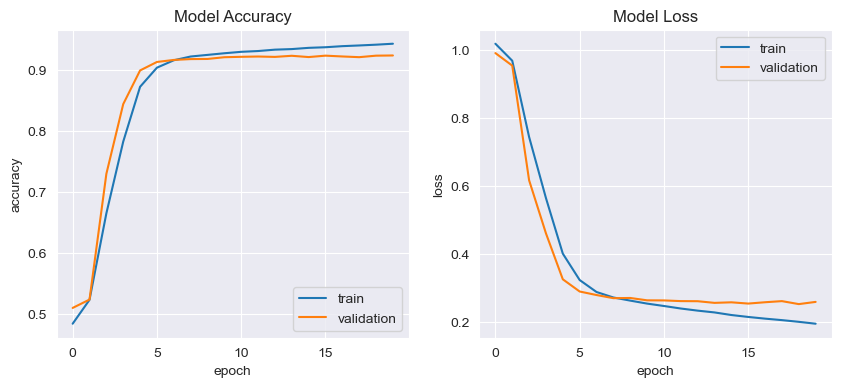

In [38]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

1121/1121 [==============================] - 2s 2ms/step


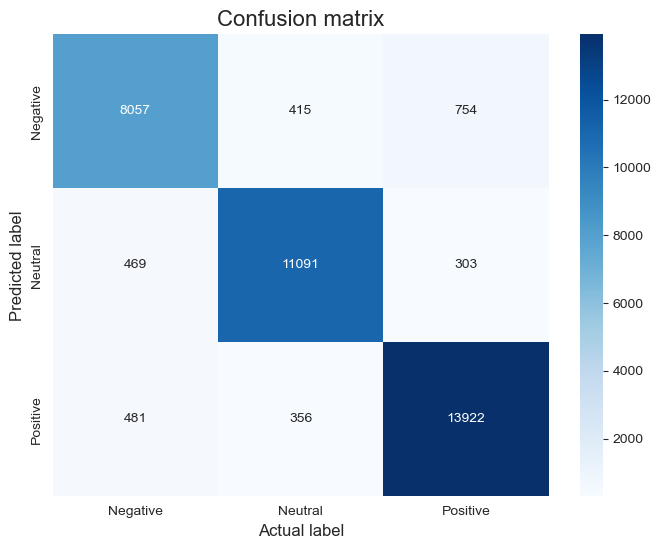

In [41]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)